In [1]:
import numpy as np
import matplotlib.pyplot as plt

import dataset
from backprop import backprop
from backprop import gp_backprop

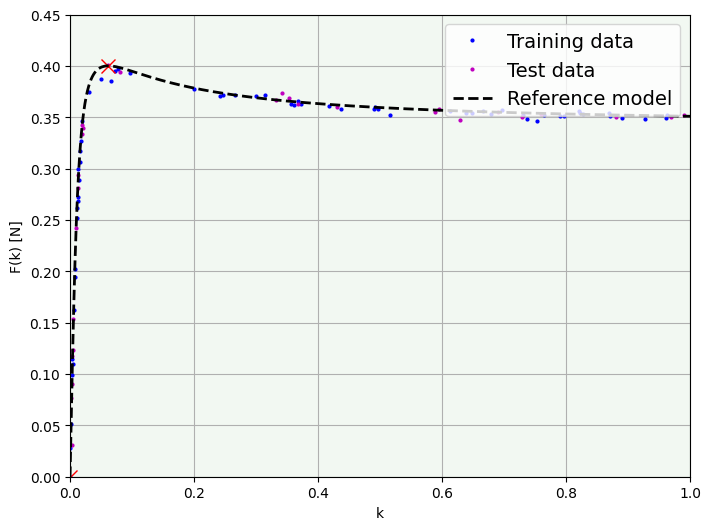

In [2]:
S = dataset.ABSDataset()
#S.sample(size=250, noise=0.03, mesh=False)
S.load('../data/abs-noise.csv')
S.split()
S.plot(width=8, height=6, plot_knowldege=True)

S.index()

S_train = dataset.NumpyDataset(S)
S_test  = dataset.NumpyDataset(S, test=True)

In [3]:
population = gp_backprop.random_population(popsize=10, max_depth=2, randstate=0)
sorted_population, eval_map = gp_backprop.evaluate(population, S_train, S_test)
best_stree = sorted_population[0]
best_eval = eval_map[id(best_stree)]

In [4]:
print("--- Best Syntax Tree ---")
print(best_stree)
print(best_eval)

#if best_stree is not None:
#    S.plot(width=8, height=7, model=best_stree)
#    plt.show()
#    S.plot(width=8, height=7, model=best_stree, zoomout=4.)
#    plt.show()
    #xp = np.linspace(S.xl, S.xu, 500)
    #plt.plot(xp, best_stree.compute_output(xp), color='green', linewidth=2, label='Model');
    #plt.show()

--- Best Syntax Tree ---
(A(x) ^ 2)
[0, 3]


In [5]:
#if best_stree is not None:
#    unkn_collector = backprop.UnknownSyntaxTreeCollector()
#    best_stree.accept(unkn_collector)
#    for unkn_label in unkn_collector.unknown_labels:
#        print(f"{unkn_label}(x) =\n{best_stree.get_unknown_stree(unkn_label).model}\n")